In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc

Using TensorFlow backend.


In [14]:
pho = np.load('photon.npy')
#hal = np.load('beamhalo.npy')
hal = np.load('photon.npy')
print ("photon dataset shape:",pho.shape[0])
print ("halo dataset shape:",hal.shape[0])
#nstrain = min(pho.shape[0],hal.shape[0])
nstrain = 2515
print ("samples from each dataset:",nstrain)

('photon dataset shape:', 29626)
('halo dataset shape:', 29626)
('samples from each dataset:', 2515)


In [15]:

X_train = np.vstack((pho[:nstrain,:,:],hal[:nstrain,:,:]))
Y_train = np.vstack((keras.utils.to_categorical(np.ones(nstrain),2)  , keras.utils.to_categorical(np.zeros(nstrain),2)))

print (X_train.shape)
print (Y_train.shape)
print Y_train

(5030, 11, 11)
(5030, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [16]:
X_train=X_train.reshape(X_train.shape[0],11,11,1)
print "creating model=========>"
model = Sequential()
model.add(Conv2D(30, (3, 3),strides=(1, 1), padding="valid", activation="relu", input_shape=(11,11,1),kernel_regularizer=regularizers.l2(0.01) ))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))

#ADAM = keras.optimizers.Adam(lr=500.005)
# Compile model
print "compilation up next=======>"
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['binary_accuracy'])
#model.compile(loss='categorical_crossentropy',optimizer='ADAM',metrics=['binary_accuracy'])
model.summary()
#plot_model(model, to_file='modelCNN.png',show_shapes=True,show_layer_names=True)
#fitting
print "fitting now=========>"
history = model.fit(X_train,Y_train , batch_size=20, epochs=200, shuffle=True, validation_split=0.2, verbose=1)

creating model=========>
compilation up next=======>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 9, 9, 30)          300       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 15)          4065      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6800      
_________________________________________________________________
dense_14 (Dense)       

4024/4024 [==============================] - 1s 306us/step - loss: 0.6619 - binary_accuracy: 0.6250 - val_loss: 0.9733 - val_binary_accuracy: 0.0000e+00
Epoch 91/200
4024/4024 [==============================] - 1s 278us/step - loss: 0.6619 - binary_accuracy: 0.6250 - val_loss: 0.9832 - val_binary_accuracy: 0.0000e+00
Epoch 92/200
4024/4024 [==============================] - 1s 275us/step - loss: 0.6617 - binary_accuracy: 0.6250 - val_loss: 0.9762 - val_binary_accuracy: 0.0000e+00
Epoch 93/200
4024/4024 [==============================] - 1s 273us/step - loss: 0.6618 - binary_accuracy: 0.6250 - val_loss: 0.9814 - val_binary_accuracy: 0.0000e+00
Epoch 94/200
4024/4024 [==============================] - 1s 276us/step - loss: 0.6618 - binary_accuracy: 0.6250 - val_loss: 0.9516 - val_binary_accuracy: 0.0000e+00
Epoch 95/200
4024/4024 [==============================] - 1s 281us/step - loss: 0.6618 - binary_accuracy: 0.6250 - val_loss: 0.9930 - val_binary_accuracy: 0.0000e+00
Epoch 96/200
4024

4024/4024 [==============================] - 1s 316us/step - loss: 0.6618 - binary_accuracy: 0.6250 - val_loss: 0.9938 - val_binary_accuracy: 0.0000e+00
Epoch 189/200
4024/4024 [==============================] - 1s 318us/step - loss: 0.6619 - binary_accuracy: 0.6250 - val_loss: 0.9919 - val_binary_accuracy: 0.0000e+00
Epoch 190/200
4024/4024 [==============================] - 1s 337us/step - loss: 0.6616 - binary_accuracy: 0.6250 - val_loss: 0.9699 - val_binary_accuracy: 0.0000e+00
Epoch 191/200
4024/4024 [==============================] - 1s 333us/step - loss: 0.6617 - binary_accuracy: 0.6250 - val_loss: 0.9784 - val_binary_accuracy: 0.0000e+00
Epoch 192/200
4024/4024 [==============================] - 1s 327us/step - loss: 0.6617 - binary_accuracy: 0.6250 - val_loss: 0.9753 - val_binary_accuracy: 0.0000e+00
Epoch 193/200
4024/4024 [==============================] - 1s 332us/step - loss: 0.6617 - binary_accuracy: 0.6250 - val_loss: 0.9785 - val_binary_accuracy: 0.0000e+00
Epoch 194/20

['loss', 'val_binary_accuracy', 'val_loss', 'binary_accuracy']


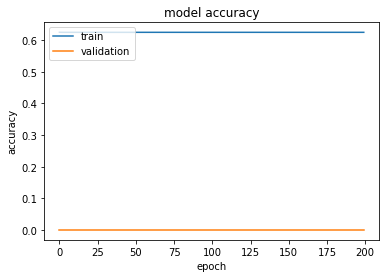

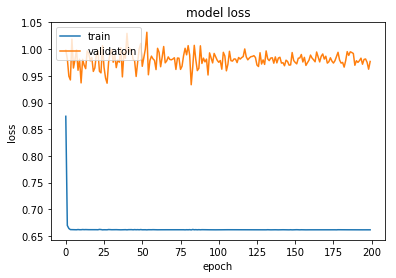

In [17]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validatoin'], loc='upper left')
plt.show()